# Exploring Vehicles_us data

## 1. Introduction and Setup

Our goal with this notbook is to explore what insights we can find in this data

### 1.1 Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline


### 1.2 Load the Data

In [14]:
vehicles = pd.read_csv(r"C:\Users\zacha\OneDrive\Desktop\programing\tripleten\Software-Development-Tools--Project\Notebooks\vehicles_us.csv")

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### 1.3 Basic info

In [15]:
print("Shape of the dataset:", vehicles.shape)

vehicles.info()

vehicles.describe(include='all')

Shape of the dataset: (51525, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


Looks like our data is clean with only a few changes. we need to make the nan values for 4 wheel drive 0. 1 for yes and 0 for no. we also need to change the data value from object to datetime64

## 2. Data cleaning 

### 2.1 Handling Missing Values

In [16]:
# check for missing values 
vehicles.isnull().sum()



price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [17]:
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)

all the other values should be ok to stay as null values. These are problably missing from the listing so there is no way we can fill in the data but it should not effect our analysis.

### 2.2 Duplicates 

In [18]:
# check for duplicated rows 
duplicates = vehicles.duplicated().sum()
print("Duplicated rows:", duplicates)


Duplicated rows: 0


### Data type conversion

In [19]:
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])

No other data needs to be converted. 

## 3. Analysis

### 3.1 numerical Columns

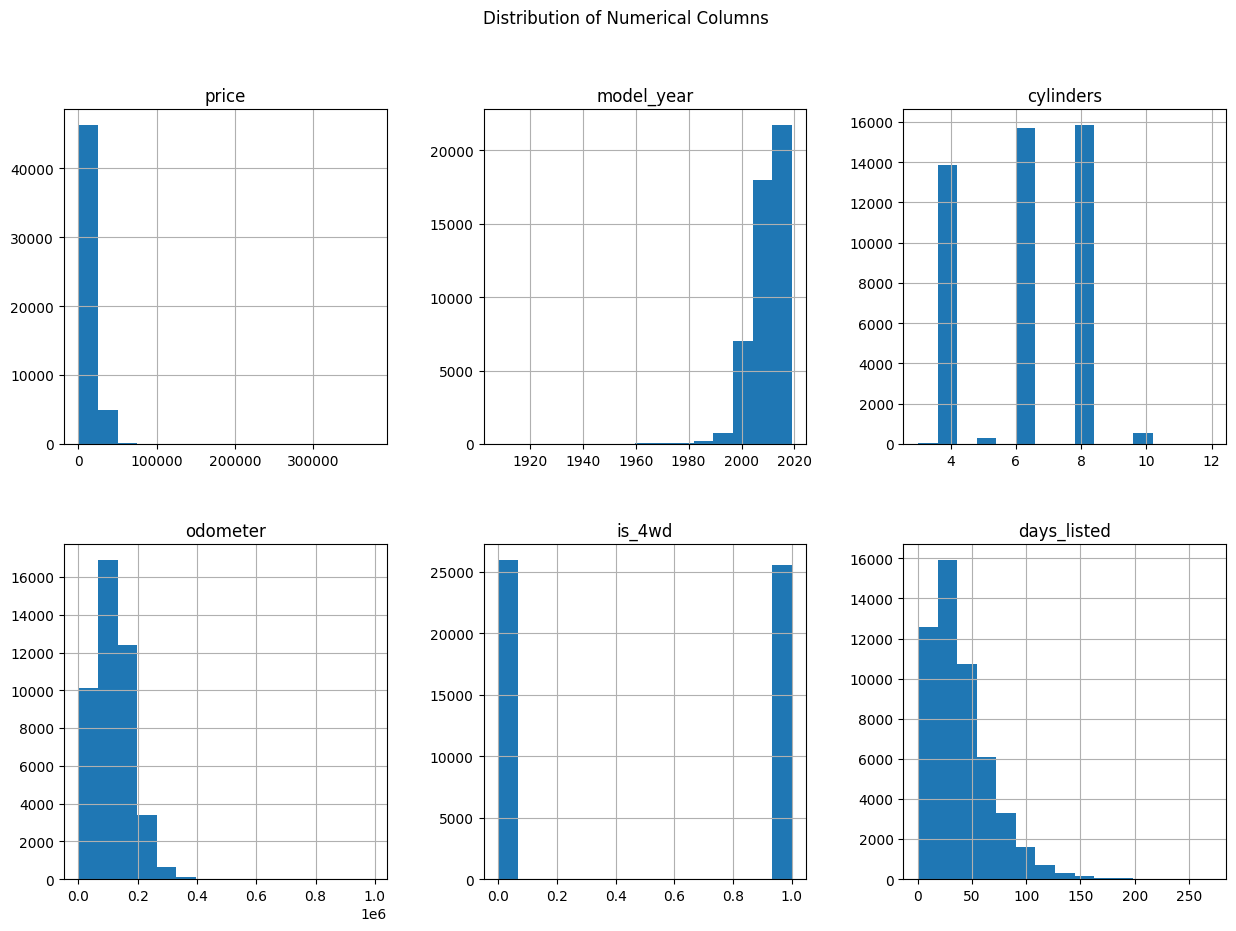

In [21]:
# Distribution of numerical columns
numerical_cols = vehicles.select_dtypes(include=np.number).columns

# Histograms
vehicles[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Distribution of Numerical Columns")
plt.show()

from this we can see where the majoraty of our cars sit in each catigory. the majority of our cars are under 200,000 miles, listed for less than 50 days, are less than 15 years old, and sell for less than $25,000.

### 3.2 Categorical Columns

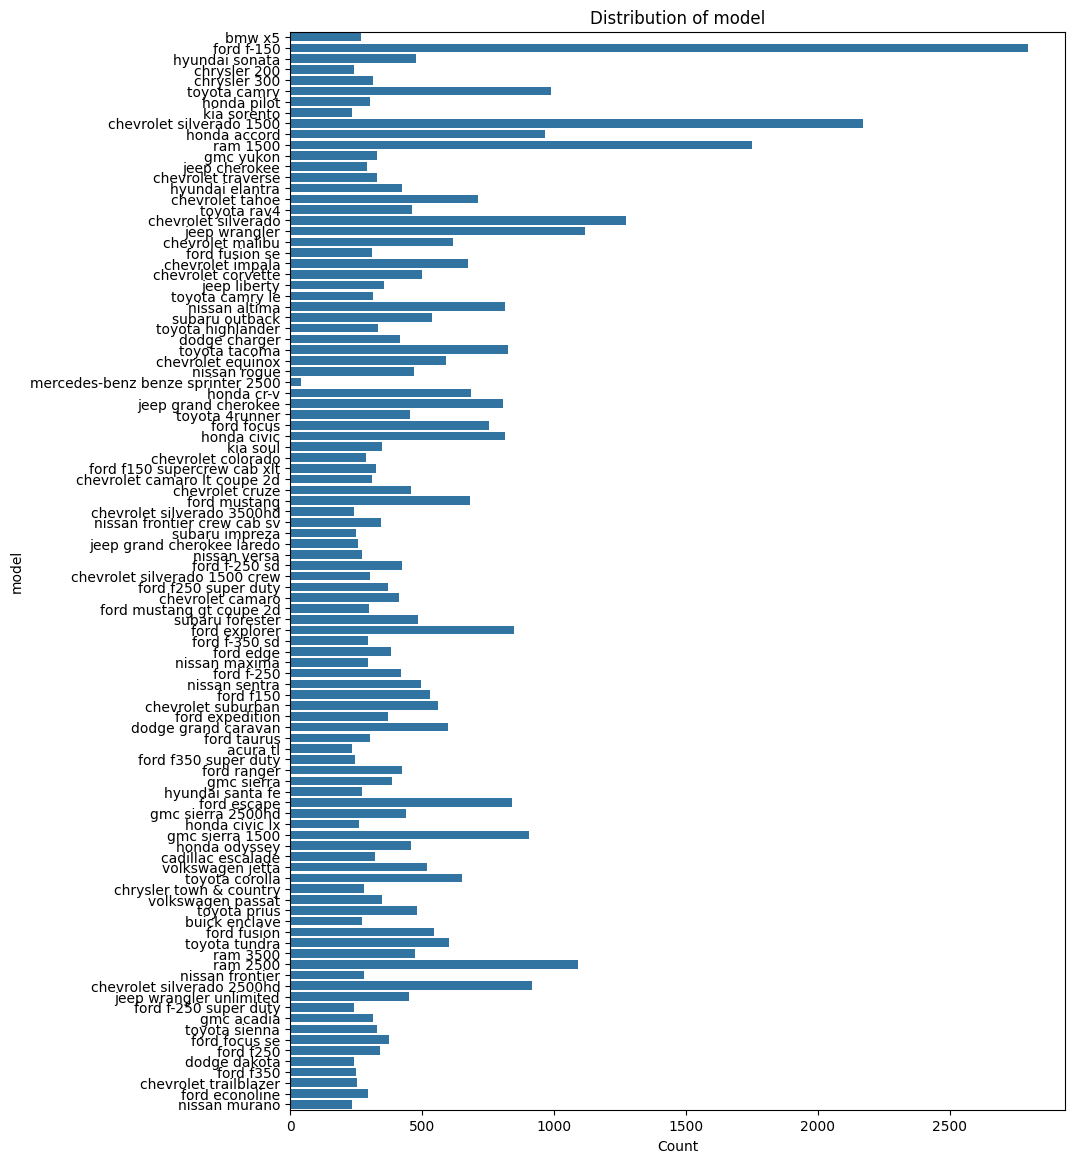

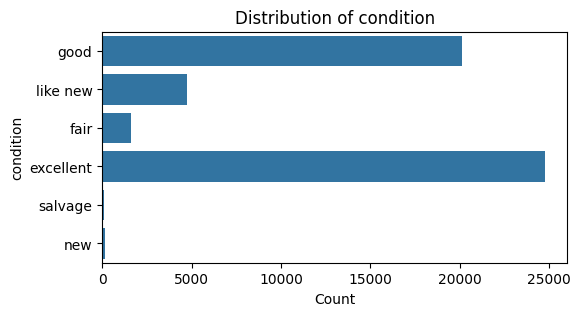

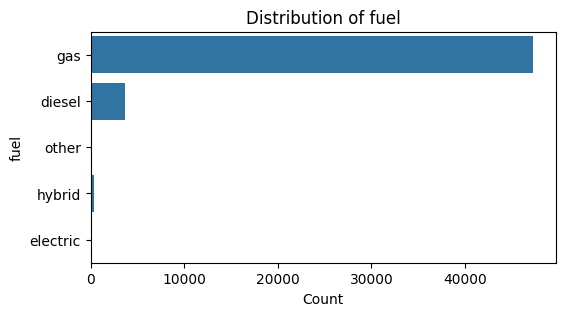

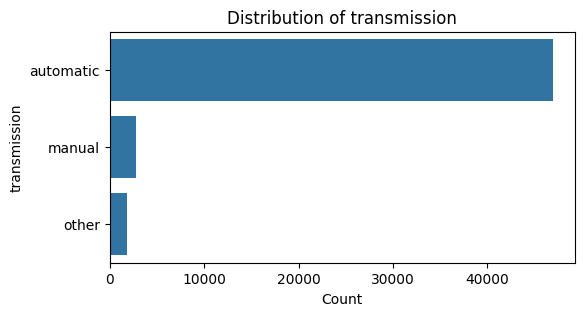

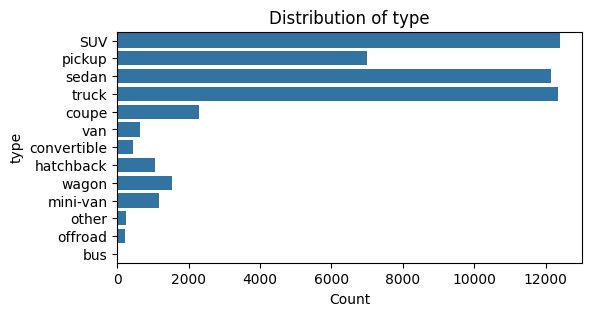

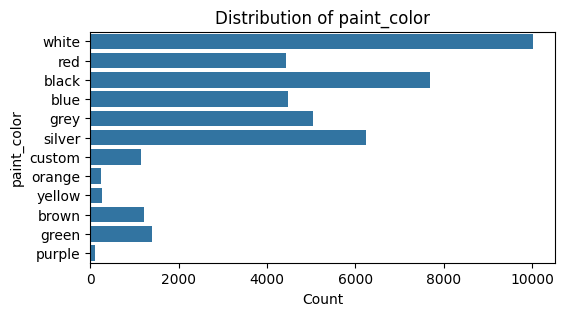

In [23]:
categorical_cols = vehicles.select_dtypes(include='object').columns
for i, col in enumerate(categorical_cols):
    # not showing the last plot because it dosnt work. i fix it later.
    if i == 6:
        break
    
    # Set figure size based on whether it's the first plot or not
    if i == 0:
        plt.figure(figsize=(10, 14))  # Larger size for the first plot
    else:
        plt.figure(figsize=(6, 3))    # Smaller size for subsequent plots

    sns.countplot(data=vehicles, y=col, orient='h')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

Here we can see that the top sold cars are the ford f-150, chevee silverato 1500, and the ram 1500. The majority of cars are sold as exelent or good with almost no new or salvage titles. Most of the cars are automatic gas cars. There is an equal spred of SUV, trucks, and sadans with pickups folowing behind. The three most popular colars are white, black, and silver. we also see that there are not very many cars that are not white, red, black, blue, grey, or silver.

C:\Users\zacha\AppData\Local\Temp\ipykernel_8872\2334595624.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  posts_per_month = vehicles_resampled.resample('M').size()


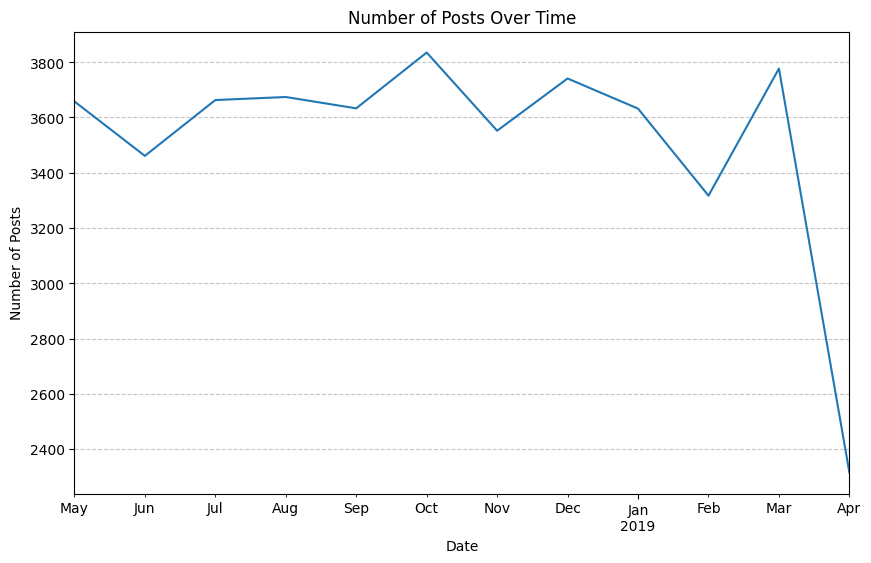

In [28]:

vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])

#set 'date_posted' as index for resampling without modifying the original DataFrame
vehicles_resampled = vehicles.set_index('date_posted')

# Resample the data by month and get the size (number of posts per month)
posts_per_month = vehicles_resampled.resample('M').size()

# Plot the number of posts over time
posts_per_month.plot(figsize=(10, 6))
plt.title("Number of Posts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


vehicles_resampled.reset_index(inplace=True)

Here we see there is not a huge amount of variance in trafic threw the year but the high time would be october and the low time would be febuary. Ignore april

### 3.3 outliers in the data

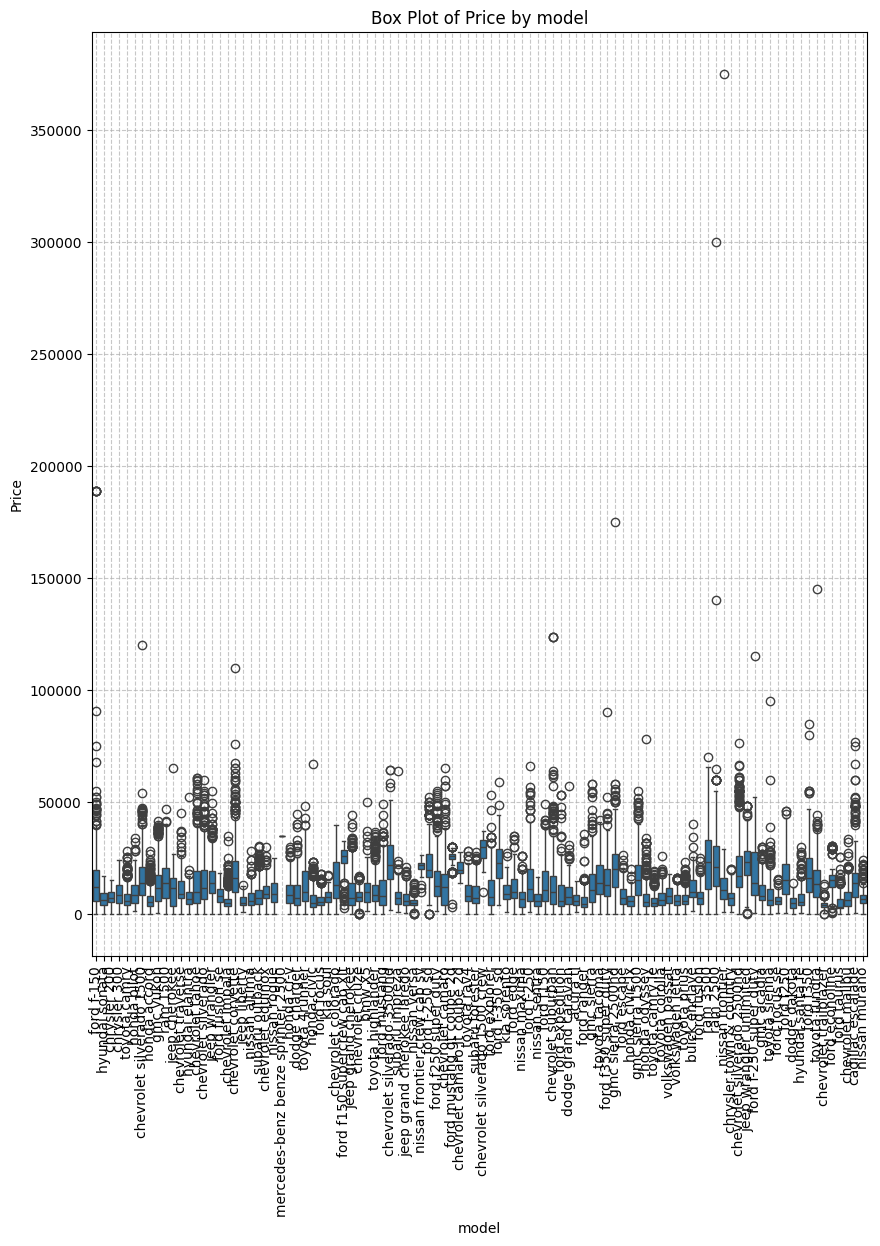

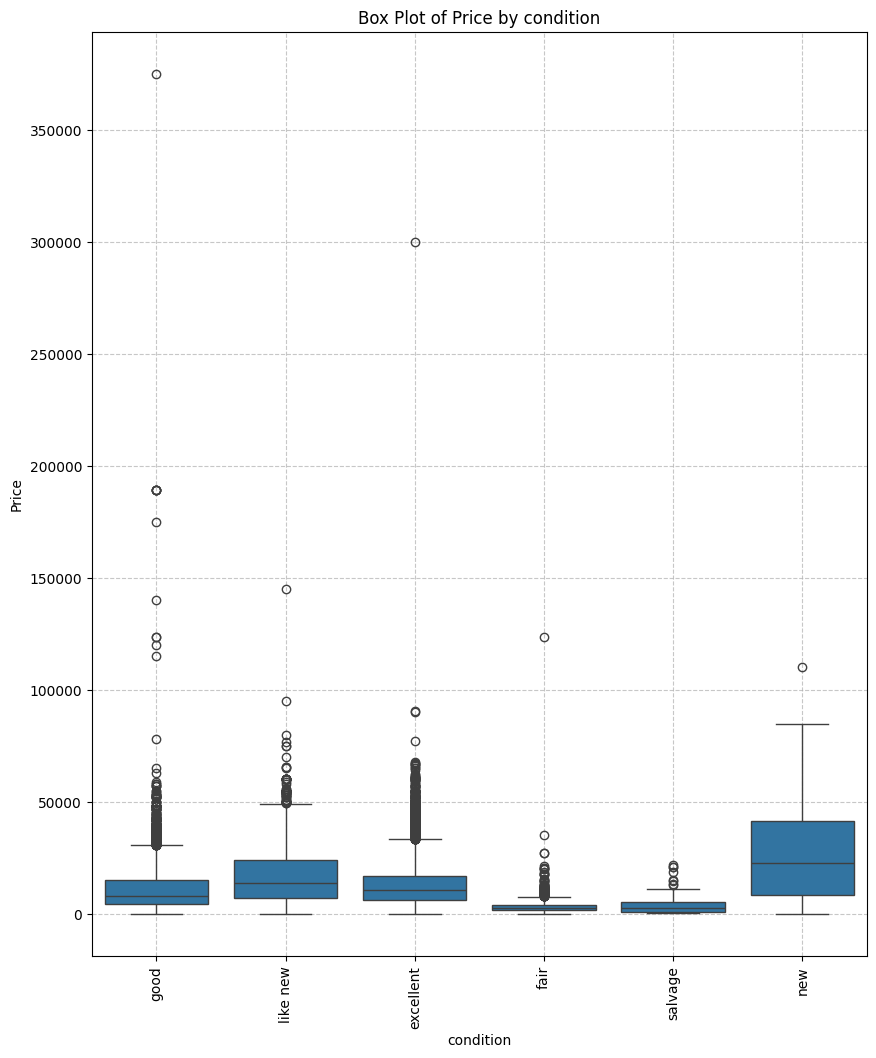

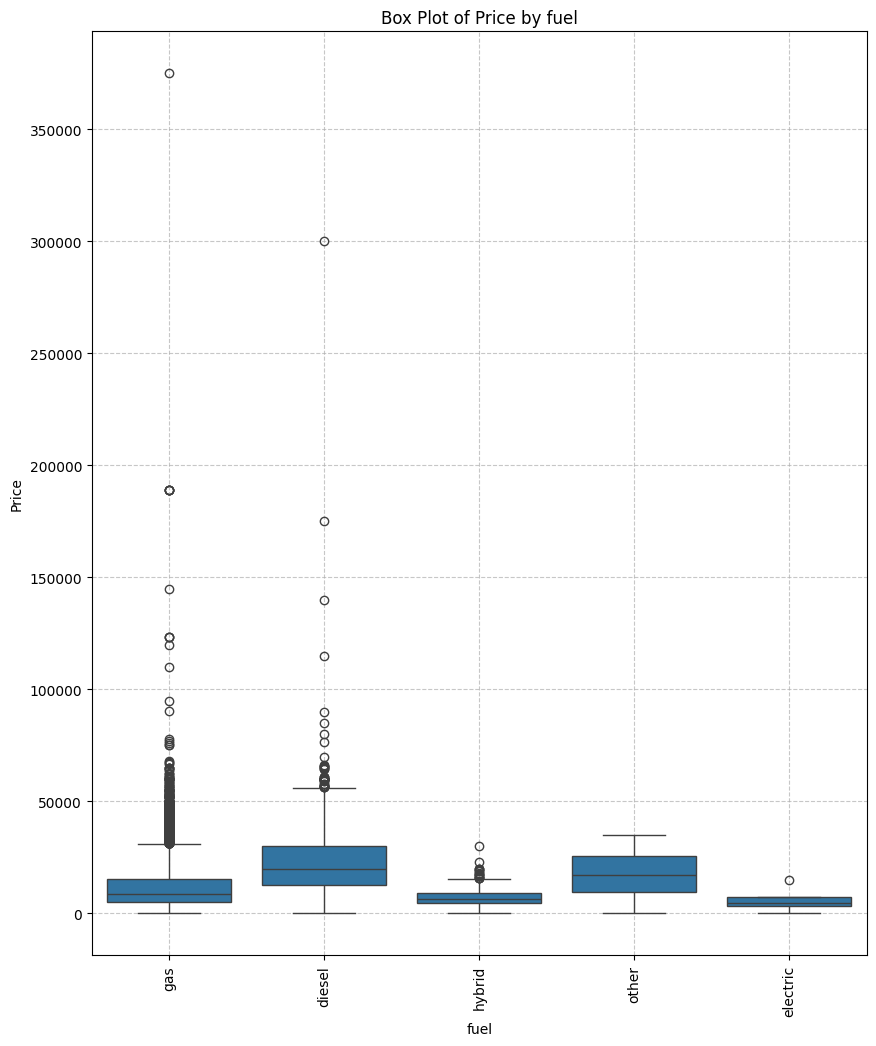

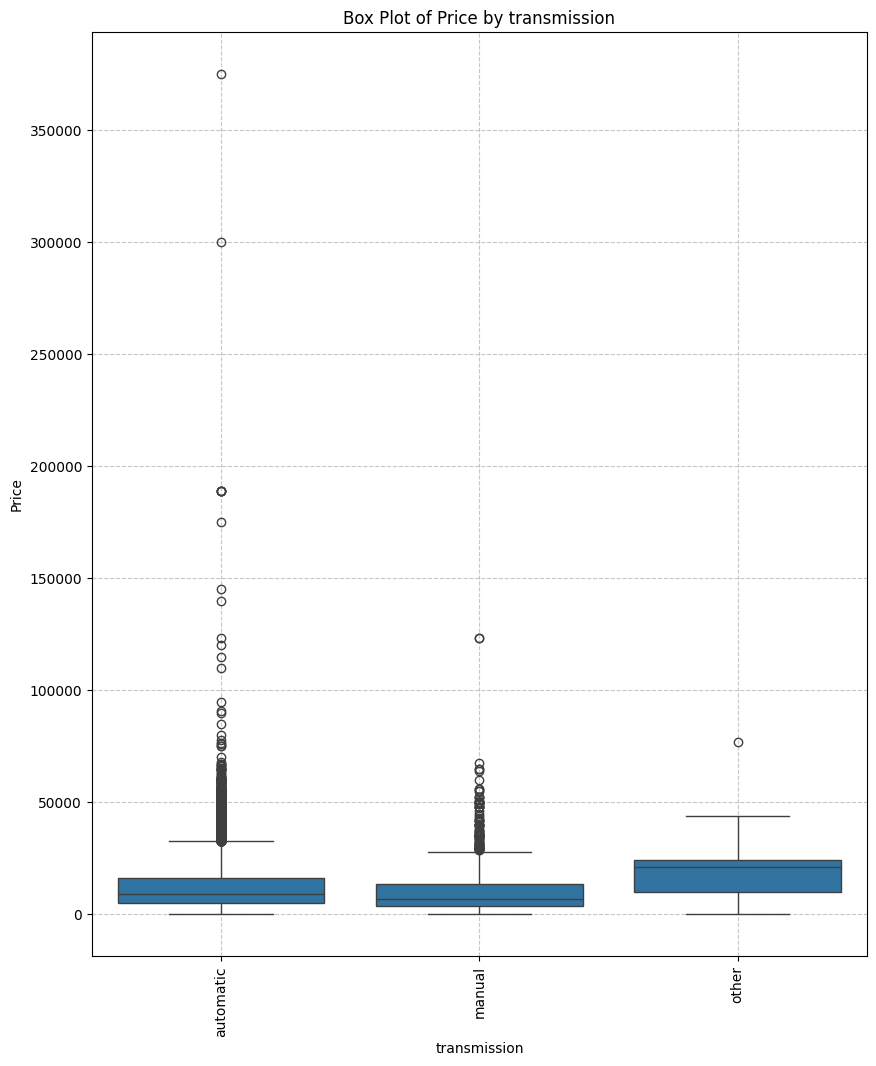

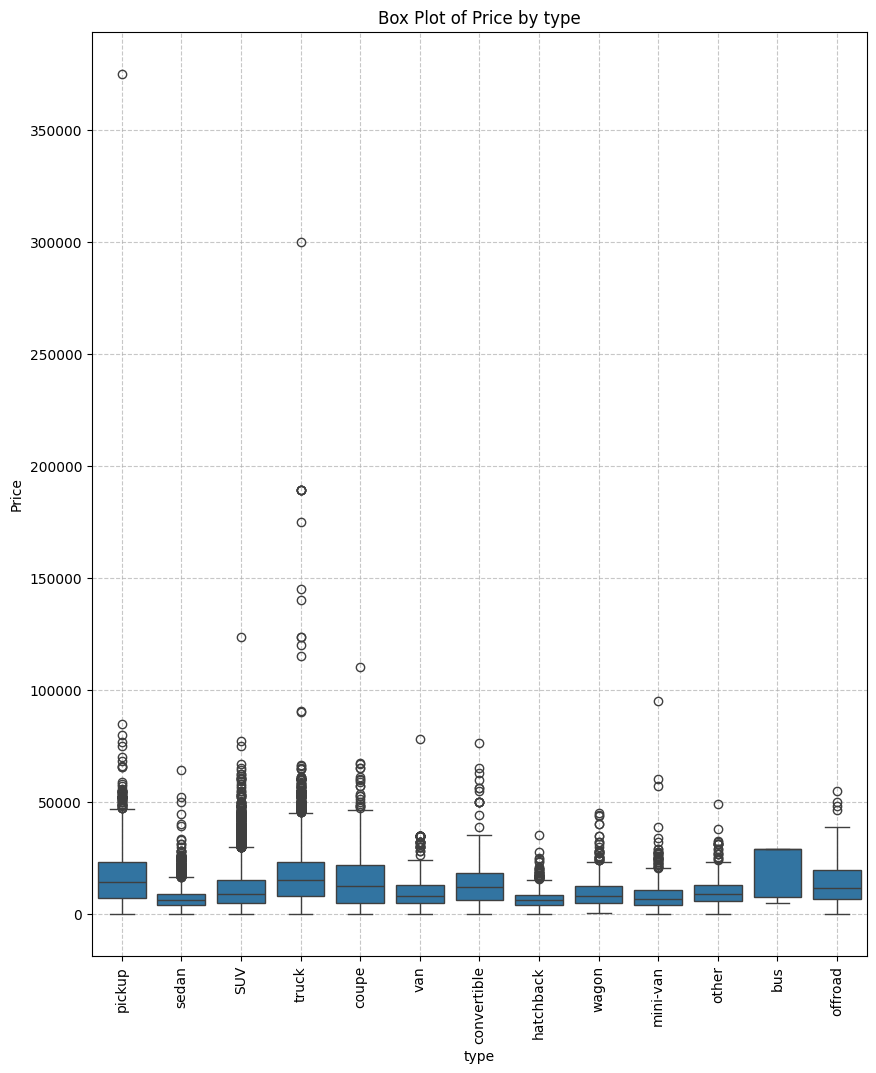

C:\Users\zacha\AppData\Local\Temp\ipykernel_8872\335899408.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vehicles, x='paint_color', y='price', palette='viridis')


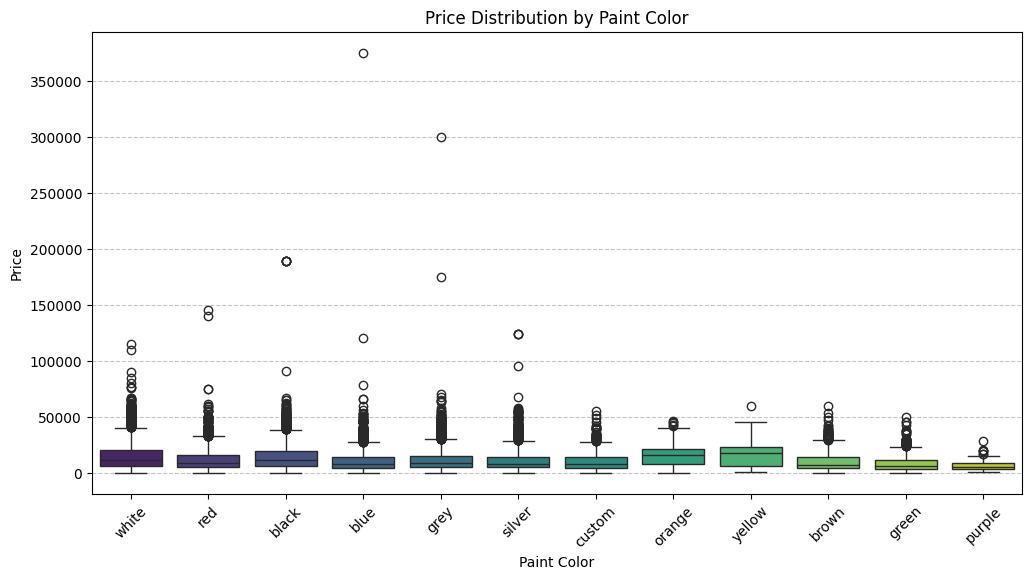

In [29]:
for col in categorical_cols:
    if col == 'paint_color':
        vehicles['paint_color'] = vehicles['paint_color'].str.strip().str.lower()

        # Drop rows with missing values in paint_color or price
        vehicles = vehicles.dropna(subset=['paint_color', 'price'])

        # Create the box plot
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=vehicles, x='paint_color', y='price', palette='viridis')
        plt.title("Price Distribution by Paint Color")
        plt.xlabel("Paint Color")
        plt.ylabel("Price")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        plt.figure(figsize=(10, 12))
        sns.boxplot(data=vehicles, x=col, y='price')
        plt.title(f"Box Plot of Price by {col}")
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.xticks(rotation=90)
        plt.grid( linestyle='--', alpha=0.7)
        plt.show()
        

### 3.4 average prices

Average price by model:
                                model         price
0   mercedes-benz benze sprinter 2500  34900.000000
1       chevrolet silverado 1500 crew  29161.422414
2            ford mustang gt coupe 2d  25089.502058
3          chevrolet silverado 3500hd  24880.259615
4         ford f150 supercrew cab xlt  24851.348837
..                                ...           ...
95                       jeep liberty   5580.529412
96                       nissan versa   5382.630137
97                       dodge dakota   5104.933333
98                        ford taurus   4998.184426
99              chevrolet trailblazer   4118.609091

[100 rows x 2 columns]


C:\Users\zacha\AppData\Local\Temp\ipykernel_8872\2341696986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price, x=col, y='price', palette='viridis')


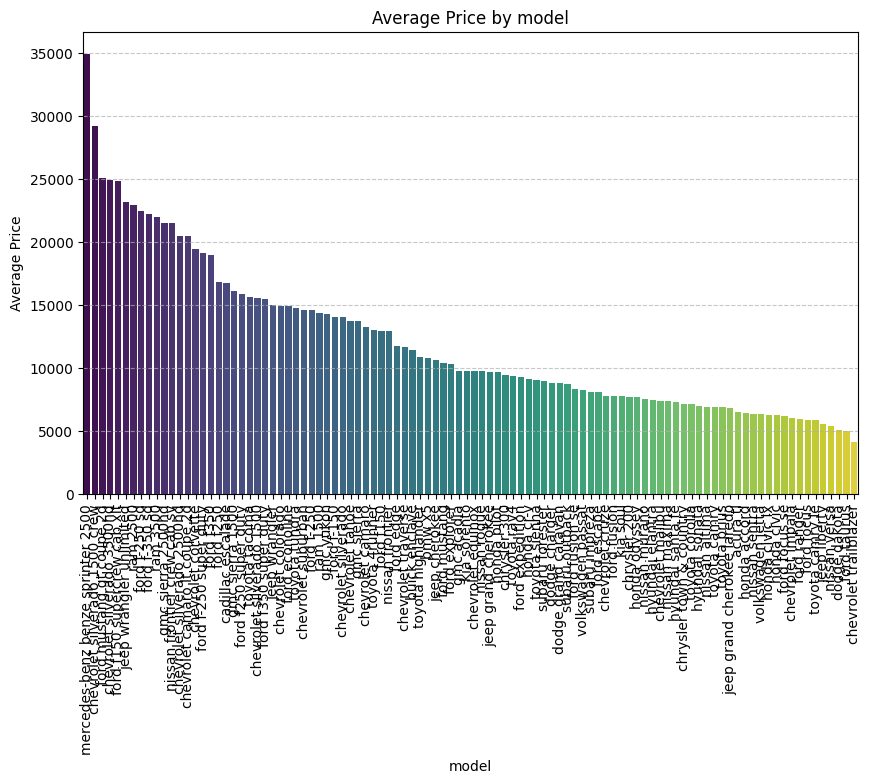

Average price by condition:
   condition         price
0        new  26870.892562
1   like new  16734.763782
2  excellent  12797.966093
3       good  10842.882342
4    salvage   4438.340206
5       fair   3340.220442


C:\Users\zacha\AppData\Local\Temp\ipykernel_8872\2341696986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price, x=col, y='price', palette='viridis')


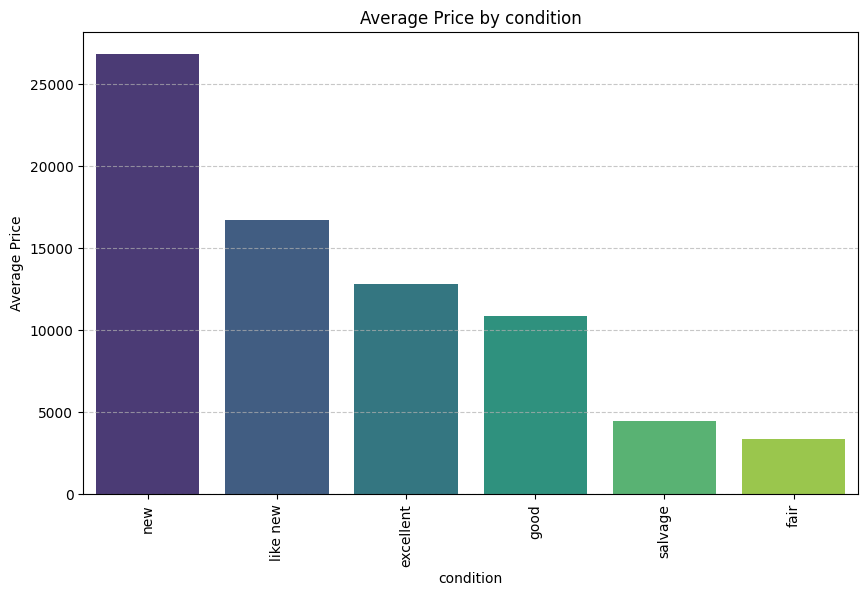

Average price by fuel:
       fuel         price
0    diesel  22716.381279
1     other  17122.264368
2       gas  11317.410220
3    hybrid   7289.562874
4  electric   6025.250000


C:\Users\zacha\AppData\Local\Temp\ipykernel_8872\2341696986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price, x=col, y='price', palette='viridis')


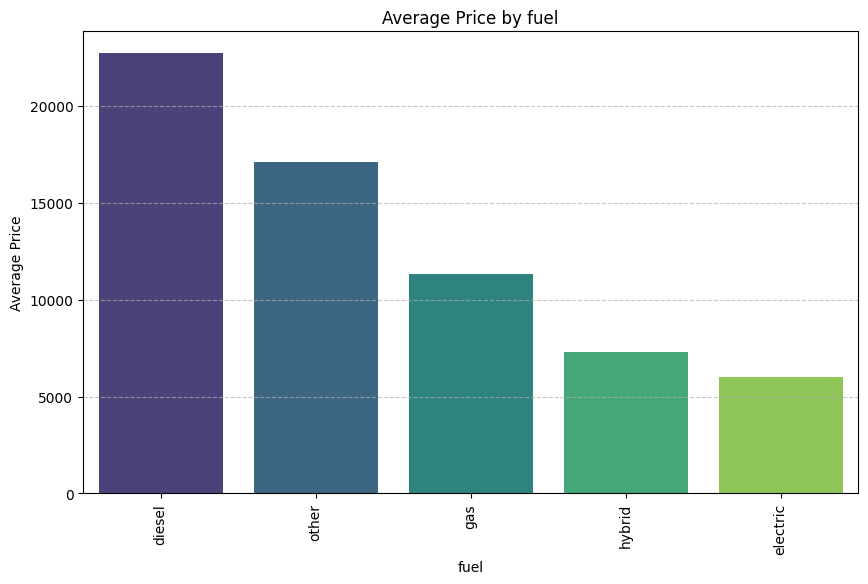

Average price by transmission:
  transmission         price
0        other  17557.445983
1    automatic  12052.255046
2       manual   9929.244060


C:\Users\zacha\AppData\Local\Temp\ipykernel_8872\2341696986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price, x=col, y='price', palette='viridis')


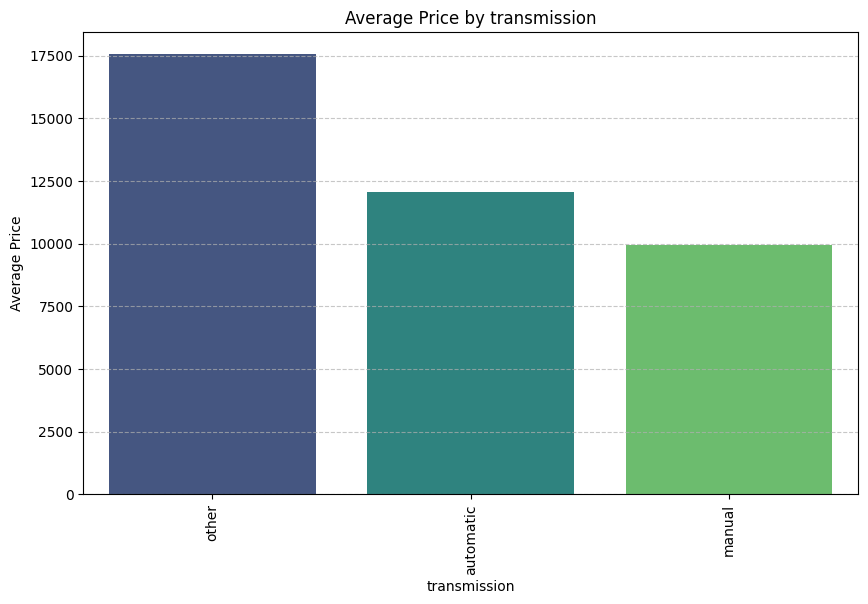

Average price by type:
           type         price
0           bus  18672.578947
1         truck  16721.684772
2        pickup  16080.903374
3       offroad  14450.376404
4         coupe  14227.451766
5   convertible  13982.105121
6           SUV  11128.269545
7         other  10800.829384
8           van  10734.781312
9         wagon   9025.853103
10     mini-van   8149.209593
11        sedan   6974.964777
12    hatchback   6818.341727


C:\Users\zacha\AppData\Local\Temp\ipykernel_8872\2341696986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price, x=col, y='price', palette='viridis')


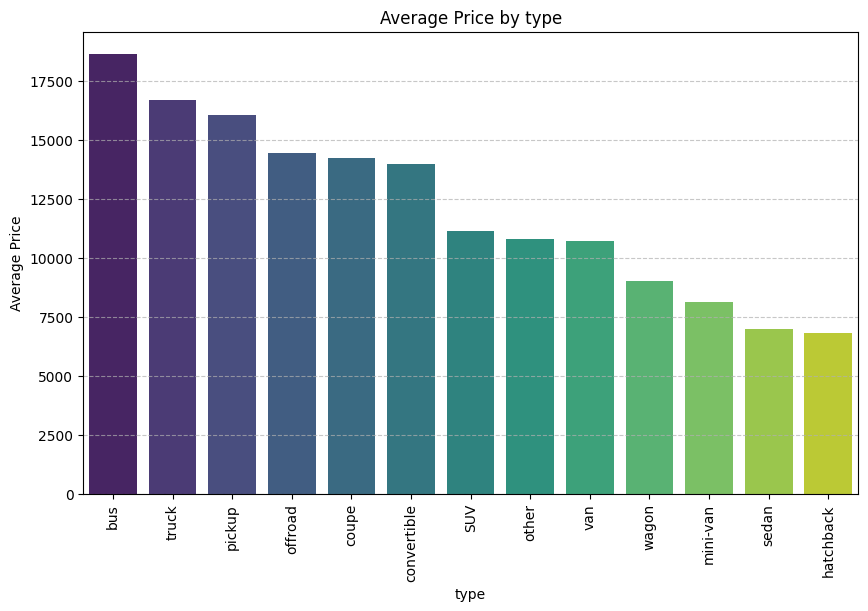

Average price by paint_color:
   paint_color         price
0       yellow  15682.223529
1       orange  14654.346320
2        white  14147.443913
3        black  13741.893786
4         grey  11459.564622
5          red  11450.044786
6       silver  10667.568546
7         blue  10269.714860
8        brown  10193.031071
9       custom  10030.104076
10       green   8426.977794
11      purple   6518.049020


C:\Users\zacha\AppData\Local\Temp\ipykernel_8872\2341696986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price, x=col, y='price', palette='viridis')


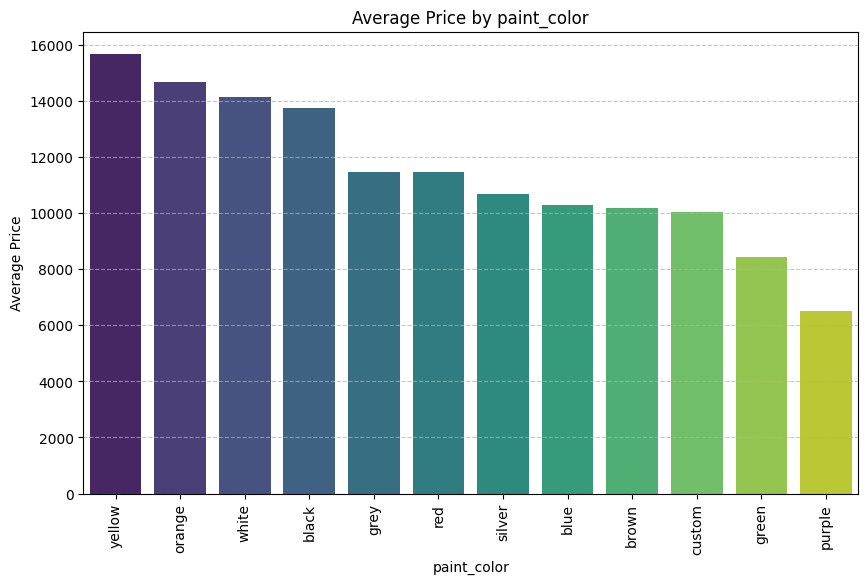

In [30]:

for col in categorical_cols:
    # Calculate the average price for each category in the column
    average_price = vehicles.groupby(col)['price'].mean().dropna().sort_values(ascending=False).reset_index()

    # Display the DataFrame in the console for inspection
    print(f"Average price by {col}:")
    print(average_price)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.barplot(data=average_price, x=col, y='price', palette='viridis')
    plt.title(f"Average Price by {col}")
    plt.xlabel(col)
    plt.ylabel("Average Price")
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Here we can see that bus, trucks, and pickups have the best average sale price. That points to why desil has a high average sale price because these vehicles are more likly to be desil. As for color your best option would be white or black. yellow and orange have a high average but also have a small sample size so the average can be a little misleading. 
The highest average price sold goes to the mercadies spritn 2500 with a stagering $34,000.

### 3.5 advanced visualization

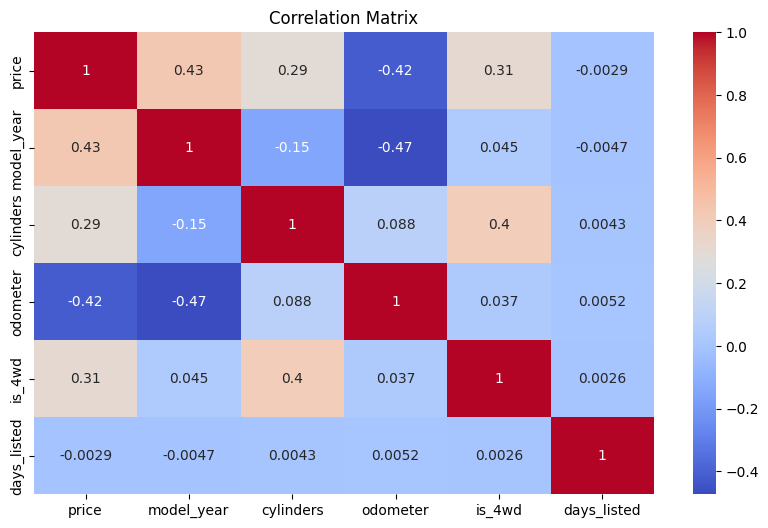

In [31]:
# Ensure your DataFrame has numeric columns
numerical_cols = vehicles.select_dtypes(include=np.number).columns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(vehicles[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Here we can see the largest corilation with price is the year the car was made folowed by if the car is 4 wheal drive and the cylinders. The cylinders and 4 wheal drive have a lot of corilation so that is also why they both corilate with price.

### 4. summary 


The top-selling vehicles are the Ford F-150, Chevy Silverado 1500, and Ram 1500, with most sold in "excellent" or "good" condition, and very few listed as new or salvage. Most cars are automatic and run on gas, and there is a balanced mix of SUVs, trucks, and sedans. The most common colors are white, black, and silver, with other colors like red, blue, grey, and silver also being fairly popular.

Sales traffic remains relatively steady throughout the year, with October being the busiest month and February the slowest.

Vehicles like buses, trucks, and pickups have the highest average sale prices, partly due to their likelihood of using diesel fuel. White and black vehicles are generally the best choices for resale value, though colors like yellow and orange show high averages due to smaller sample sizes. The most expensive vehicle on average is the Mercedes Sprinter 2500, selling at around $34,000.

Price is most strongly correlated with the car's year, followed by whether it’s four-wheel drive and the number of cylinders, with a significant overlap in correlation between the last two factors.

## 5. Save data

In [32]:
# Save the cleaned and prepared dataset
vehicles.to_csv("cleaned_dataset.csv", index=False)